# Cluster the Olivetti Faces Dataset

O clássico conjunto de dados Olivetti contém 400 imagens de rostos em escala de cinza de $64 \times 64$. Cada imagem é achatada para um vetor 1D de tamanho 4.096. Quarenta pessoas diferentes foram fotografadas (dez de cada vez). A tarefa é treinar um modelo que possa predizer qual pessoa é representada em cada foto.
1) Carregue o conjunto de dados usando e o divida em conjunto de treino,teste e validação.
2) Como o conjunto é muito pequeno, utilize amostragem estratificada para garantir que haja o mesmo número de imagens por pessoa.
3) Clusterize o conjunto usando o Kmeans e selecione o número de clusters de acordo com o coeficiente de silhueta.
4) Treine um modelo de mistura guassiana com os mesmos dados. Empregue o modelo para gerar novos rostos usando o método sample() 

In [1]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

In [2]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_idx, _ = next(split.split(olivetti.data, olivetti.target))
X_train = olivetti.data[train_idx]
y_train = olivetti.target[train_idx]

In [8]:
print(X_train.shape,y_train.shape)

(360, 4096) (360,)


In [9]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)

In [10]:
pca.n_components_

242

In [11]:
X_train_pca.shape

(360, 242)

In [12]:
from sklearn.cluster import KMeans
k_range = range(5,150,5)
kmeans_per_k = []
for k in k_range:
    print(f"k={k}")
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


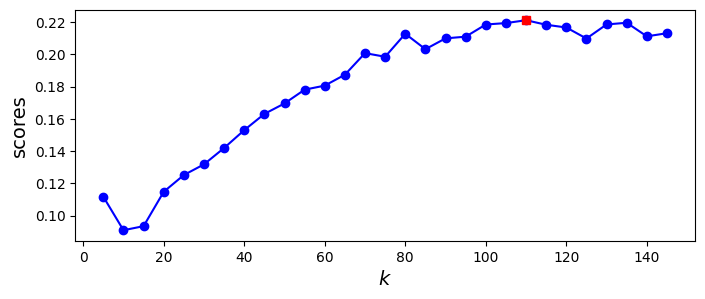

In [15]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]
best_idx = np.argmax(scores)
best_k = k_range[best_idx]
best_score = scores[best_idx]

plt.figure(figsize=(8,3))
plt.plot(k_range, scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("scores", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [16]:
best_k

110

In [17]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1,64,64)
    n_rows = (len(faces)-1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows*1.1))
    for index, (face,label) in enumerate(zip(faces,labels)):
        plt.subplot(n_rows,n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

In [18]:
best_model = kmeans_per_k[best_idx]

cluster 0


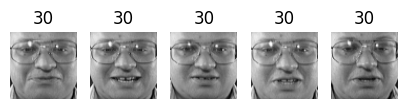

cluster 1


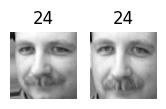

cluster 2


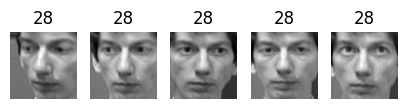

cluster 3


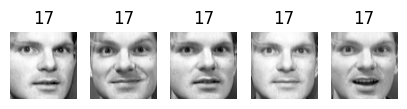

cluster 4


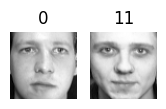

cluster 5


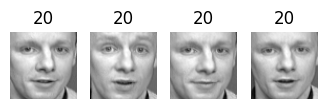

cluster 6


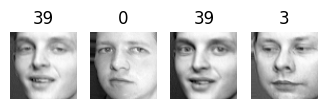

cluster 7


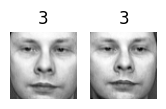

cluster 8


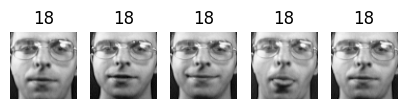

cluster 9


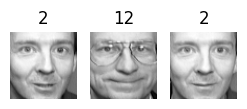

cluster 10


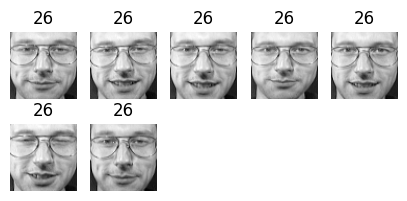

cluster 11


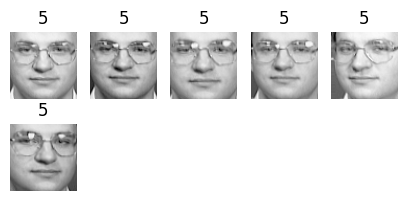

cluster 12


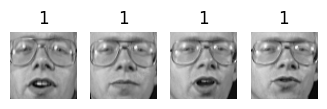

cluster 13


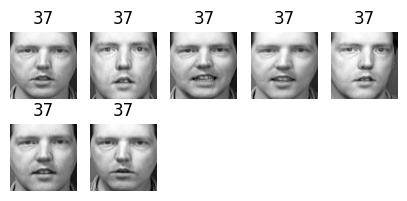

cluster 14


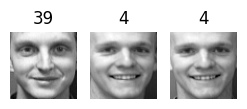

cluster 15


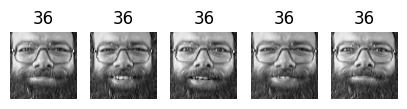

cluster 16


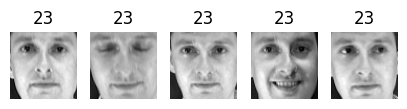

cluster 17


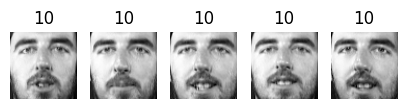

cluster 18


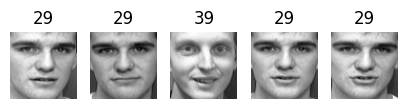

cluster 19


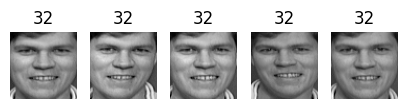

cluster 20


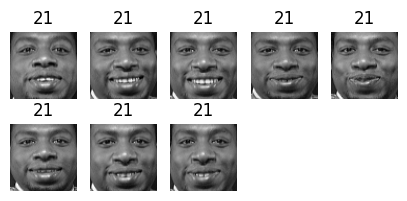

cluster 21


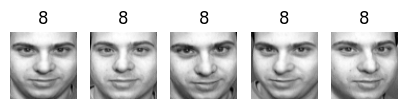

cluster 22


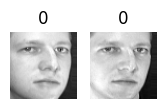

cluster 23


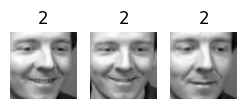

cluster 24


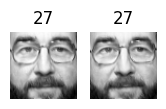

cluster 25


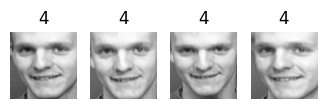

cluster 26


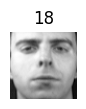

cluster 27


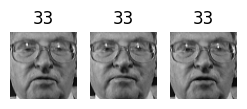

cluster 28


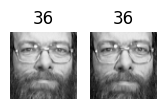

cluster 29


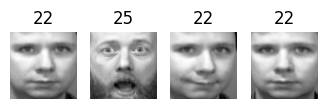

cluster 30


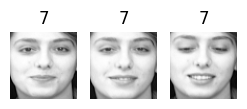

cluster 31


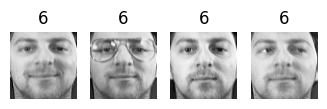

cluster 32


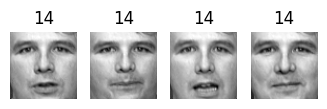

cluster 33


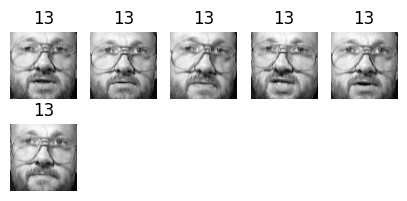

cluster 34


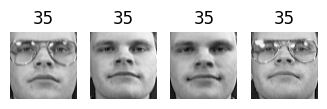

cluster 35


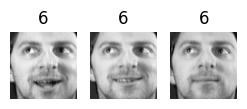

cluster 36


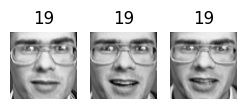

cluster 37


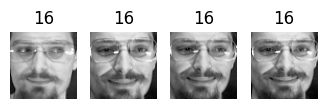

cluster 38


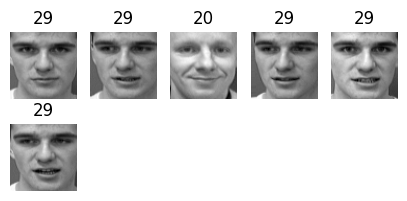

cluster 39


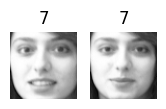

cluster 40


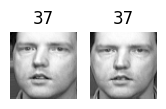

cluster 41


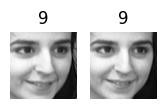

cluster 42


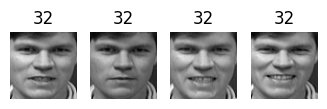

cluster 43


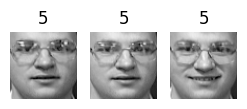

cluster 44


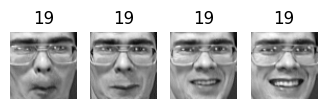

cluster 45


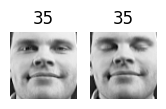

cluster 46


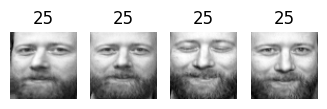

cluster 47


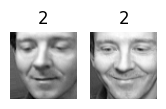

cluster 48


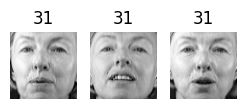

cluster 49


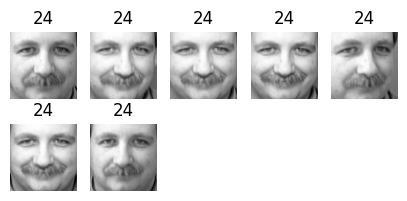

cluster 50


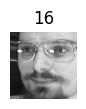

cluster 51


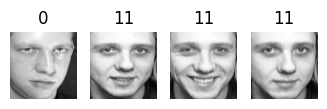

cluster 52


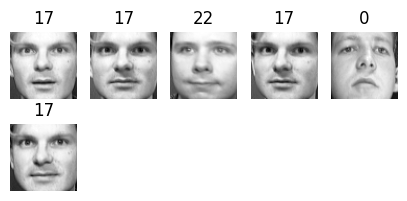

cluster 53


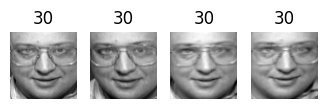

cluster 54


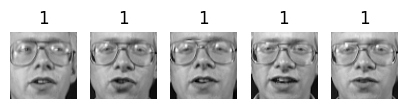

cluster 55


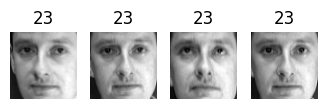

cluster 56


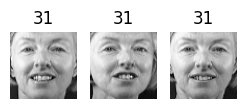

cluster 57


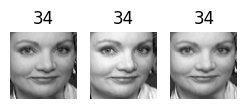

cluster 58


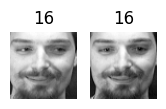

cluster 59


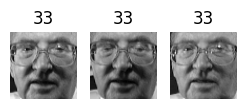

cluster 60


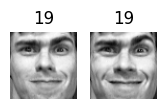

cluster 61


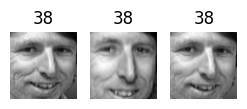

cluster 62


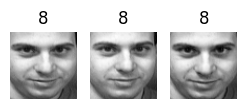

cluster 63


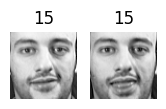

cluster 64


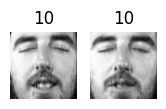

cluster 65


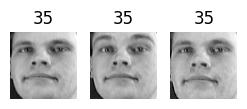

cluster 66


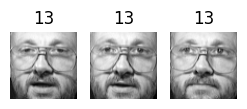

cluster 67


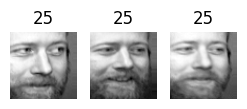

cluster 68


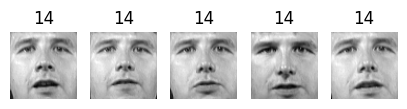

cluster 69


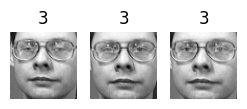

cluster 70


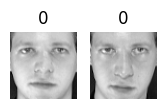

cluster 71


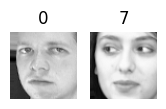

cluster 72


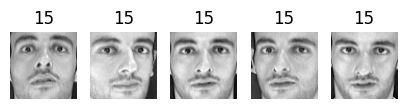

cluster 73


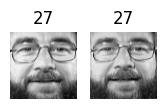

cluster 74


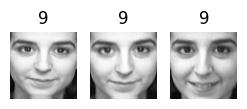

cluster 75


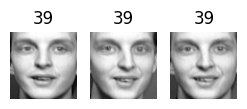

cluster 76


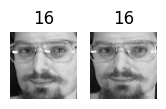

cluster 77


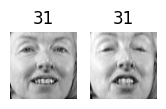

cluster 78


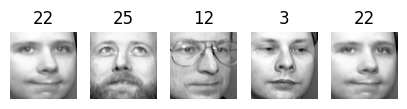

cluster 79


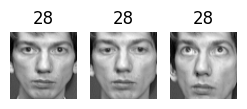

cluster 80


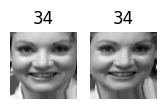

cluster 81


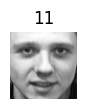

cluster 82


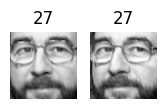

cluster 83


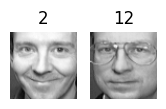

cluster 84


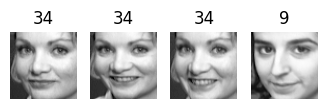

cluster 85


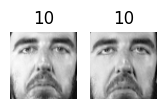

cluster 86


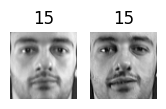

cluster 87


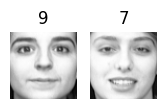

cluster 88


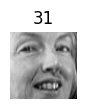

cluster 89


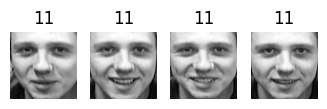

cluster 90


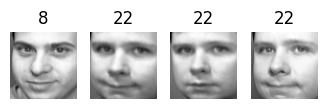

cluster 91


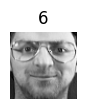

cluster 92


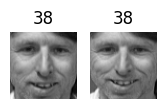

cluster 93


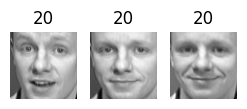

cluster 94


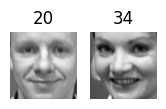

cluster 95


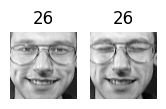

cluster 96


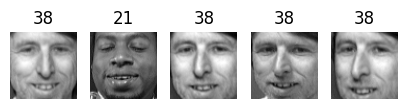

cluster 97


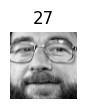

cluster 98


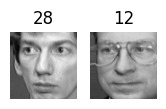

cluster 99


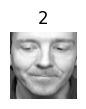

cluster 100


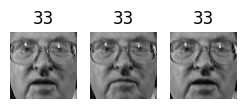

cluster 101


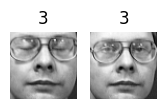

cluster 102


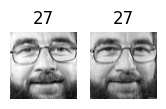

cluster 103


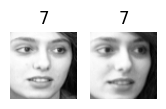

cluster 104


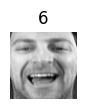

cluster 105


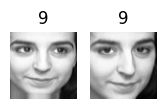

cluster 106


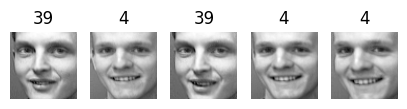

cluster 107


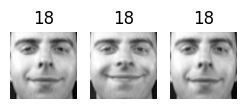

cluster 108


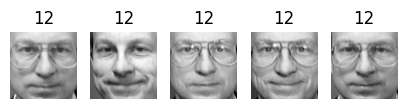

cluster 109


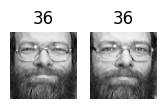

In [19]:
for cluster_id in np.unique(best_model.labels_):
    print("cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

In [20]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [21]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

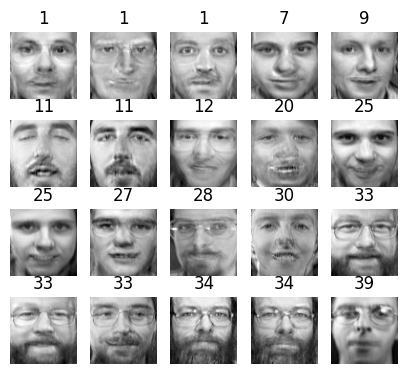

In [22]:
plot_faces(gen_faces, y_gen_faces)